# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 3</span>

### Exercise 03.1 <span style="color:red"> Plain vanilla option pricing </span>

Black-Scholes theory assumes that the time evolution of the asset price is stochastic and exhibits geometric Brownian motion (GBM) with constant risk-free interest rate $r$ and volatility $\sigma$.

Black-Scholes <span style="color:blue"> analytic solution </span> for the price at time t<T:
- European Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- European Put-option price:
$$ C\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

where 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

where $d_2 = d_1 - \sigma\sqrt{T-t}$, and where
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
is the cumulative of Gaussian $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
and where
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

By using the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

compute at time $t=0$ **via Monte Carlo** the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$:

1. <span style="color:red"> By sampling **directly** the final asset price $S(T)$</span> for a $GBM(r,\sigma^2)$
2. <span style="color:red"> By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price</span> 
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$

<span style="color:red">Make four pictures for the estimation of the European call-option prices, $C[S(0),0]$ (direct and discretized), and put-option prices, $P[S(0),0]$ (direct and discretized), with their uncertainties </span> with a large number of asset prices at time $t=T$, say $M\ge 10^4$, as a function of the number of blocks, $N$</font>. <span style="color:blue"> As usual, in computing statistical uncertainties, use data blocking.</span>

### For comparison, Black-Scholes analytic solution:

In [1]:
import scipy
from scipy.special import erf
from scipy import log, exp, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


C:\Users\Alessandro\anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
C:\Users\Alessandro\anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
C:\Users\Alessandro\anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
C:\Users\Alessandro\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  
C:\Users\Alessandro\anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
C:\Users\Alessandro\anaconda3\lib\site-packages\ipykernel_launc

#### Codice

Il codice utilizzato è contenuto nella cartella Financial_Market; contiene il solito codice random, al quale ho aggiunto due metodi per simulare l'evoluzione di moto Browniano geometrico, discretizzando e non l'intervallo temporale, per svolgere l'esercizio, ed un main che produce i file di output coi dati.

I grafici prodotti sotto mostrano la differeza, in funzione del numero di blocchi, tra il valore simulato dei prezzi e il valore teorica ricavato sopra, che risultano compatibili per entrambe le opzioni e per entrambi i metodi scelti per calcolare l'evoluzione di moto Browniano geometrico dell'asset price.

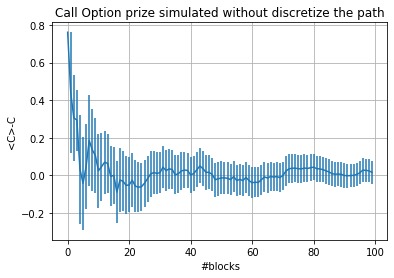

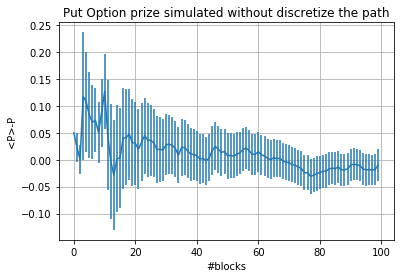

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

M = 100000      #numero di GBM simulati
N = 100         #numero di blocchi
L = M/N
mean_call = np.loadtxt("mean_call.txt")
std_call = np.loadtxt("sigma_call.txt")
mean_put = np.loadtxt("mean_put.txt")
std_put = np.loadtxt("sigma_put.txt")
y = np.arange(N)

plt.errorbar(y,mean_call - call, yerr=std_call)
plt.title("Call Option prize simulated without discretize the path")
plt.xlabel('#blocks')
plt.ylabel('<C>-C')
plt.grid(True)
plt.show()

plt.errorbar(y,mean_put - put , yerr=std_put)
plt.title("Put Option prize simulated without discretize the path")
plt.xlabel('#blocks')
plt.ylabel('<P>-P')
plt.grid(True)
plt.show()

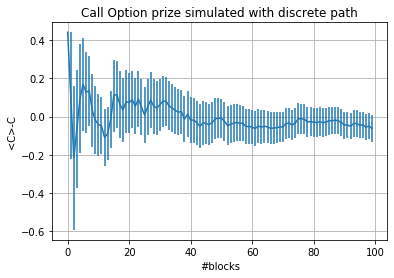

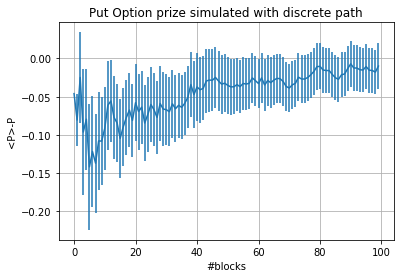

In [3]:
mean_call2 = np.loadtxt("mean_call_discrete.txt")
std_call2 = np.loadtxt("sigma_call_discrete.txt")
mean_put2 = np.loadtxt("mean_put_discrete.txt")
std_put2 = np.loadtxt("sigma_put_discrete.txt")

plt.errorbar(y,mean_call2 - call, yerr=std_call2)
plt.title("Call Option prize simulated with discrete path")
plt.xlabel('#blocks')
plt.ylabel('<C>-C')
plt.grid(True)
plt.show()

plt.errorbar(y,mean_put2 - put , yerr=std_put2)
plt.title("Put Option prize simulated with discrete path")
plt.xlabel('#blocks')
plt.ylabel('<P>-P')
plt.grid(True)
plt.show()